# CIFAR-10 Dataset CNN Classification Model

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam,Adagrad

In [22]:
from keras.datasets import cifar10
data=cifar10.load_data()

In [23]:
(X_train, y_train), (X_test, y_test)=data

In [24]:
# The classes are:
# Label	Description
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

In [25]:
# Checking the shape of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print()
print()

print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


[6]
[9]
[9]
[4]


In [26]:
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

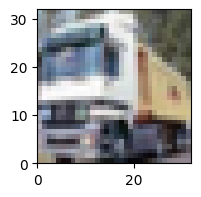

In [27]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1],extent=(0,32,0,32),cmap='gray')

In [28]:
# Normalising the data

X_train = X_train/255
X_test = X_test/255

In [29]:
# Reshaping the data as CNN model accepts input in a particular shape only

# X_train = np.expand_dims(X_train,-1)
# X_test = np.expand_dims(X_test,-1)

In [30]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [31]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1)

In [32]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((45000, 32, 32, 3), (5000, 32, 32, 3), (45000, 10), (5000, 10))

# Building our CNN Model

In [33]:
model=keras.models.Sequential([
                        keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),activation='relu',padding='same',input_shape=[32,32,3]),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),


                        #Adding the second convulational layer
                        keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),activation='relu',padding='same'),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),


                         #Adding the third convulational layer
                        keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),activation='relu',padding='same'),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),

                        # Adding hidden layer
                        keras.layers.Dense(units=128,activation='relu'),
                        keras.layers.BatchNormalization(),
                        keras.layers.Dropout(rate=0.1),
                        keras.layers.Dense(units=256,activation='relu'),
                        keras.layers.BatchNormalization(),
                        keras.layers.Dense(units=512,activation='relu'),
                        keras.layers.BatchNormalization(),
                        keras.layers.Dropout(rate=0.1),


                        # Adding the output layer
                        keras.layers.Dense(units=10,activation='softmax')
                        ])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 64)         

In [35]:
#Compiling the model

optm=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optm,loss='categorical_crossentropy',metrics=['accuracy'])

# Data Augumentation is necessary technique to avoid the overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=13, zoom_range=0.11, width_shift_range=0.1, height_shift_range=0.1)
train_generator=  datagen.flow(X_train,y_train)

In [36]:
# Training the model using the Fit method



model.fit(train_generator,epochs=40,batch_size=500,validation_data=(X_val,y_val))

Epoch 1/40
1407/1407 [==============================] - 43s 26ms/step - loss: 1.9103 - accuracy: 0.3374 - val_loss: 1.7021 - val_accuracy: 0.4088
Epoch 2/40
1407/1407 [==============================] - 36s 26ms/step - loss: 1.5757 - accuracy: 0.4403 - val_loss: 1.4162 - val_accuracy: 0.5062
Epoch 3/40
1407/1407 [==============================] - 35s 25ms/step - loss: 1.4265 - accuracy: 0.4937 - val_loss: 1.2616 - val_accuracy: 0.5520
Epoch 4/40
1407/1407 [==============================] - 33s 24ms/step - loss: 1.3254 - accuracy: 0.5254 - val_loss: 1.3164 - val_accuracy: 0.5494
Epoch 5/40
1407/1407 [==============================] - 34s 24ms/step - loss: 1.2524 - accuracy: 0.5547 - val_loss: 1.2850 - val_accuracy: 0.5462
Epoch 6/40
1407/1407 [==============================] - 34s 24ms/step - loss: 1.1811 - accuracy: 0.5800 - val_loss: 1.0473 - val_accuracy: 0.6324
Epoch 7/40
1407/1407 [==============================] - 35s 25ms/step - loss: 1.1403 - accuracy: 0.5940 - val_loss: 1.0147 -

# Checking and Testing the model now

In [37]:
# The classes are:
class_Label =[
'airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

In [38]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 122ms/step


array([[0.03, 0.01, 0.  , 0.5 , 0.  , 0.18, 0.02, 0.01, 0.2 , 0.04]],
      dtype=float32)

In [39]:
#This is the predicted value by model
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))


1/1 [==============================] - 0s 18ms/step


3

In [40]:
#This is the ground reality


np.argmax(y_test[0])

3

In [41]:
# Now we would like to check with some random datapoints in the test data

np.argmax(model.predict(np.expand_dims(X_test[123],axis=0)).round(2))


1/1 [==============================] - 0s 17ms/step


2

In [42]:
np.argmax(y_test[123])

2

In [43]:
y_pred=model.predict(X_test).round()
y_pred

313/313 [==============================] - 1s 3ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [44]:
# Checking the accuracy of the model

model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.7221 - accuracy: 0.7562


[0.7221234440803528, 0.7562000155448914]

In [45]:
y_test_labels=[np.argmax(y) for y in y_test]
y_pred_labels=[np.argmax(x) for x in y_pred]
cm=confusion_matrix(y_test_labels,y_pred_labels)
cm

array([[877,  19,  11,   1,   9,   0,   2,   9,  39,  33],
       [ 21, 897,   0,   0,   0,   0,   0,   2,   7,  73],
       [273,  11, 539,  10,  55,   5,  40,  50,   6,  11],
       [352,  10,  23, 344,  58,  40,  69,  62,  17,  25],
       [139,   3,  22,   4, 674,   1,  39, 110,   7,   1],
       [309,  12,   8,  78,  29, 433,  21,  91,   5,  14],
       [105,   8,  12,   7,  27,   0, 829,   5,   1,   6],
       [ 97,   4,   5,   2,  15,   2,   0, 867,   1,   7],
       [ 85,  28,   2,   0,   4,   0,   1,   2, 854,  24],
       [ 57,  56,   3,   0,   1,   0,   0,   7,  13, 863]])

<Axes: >

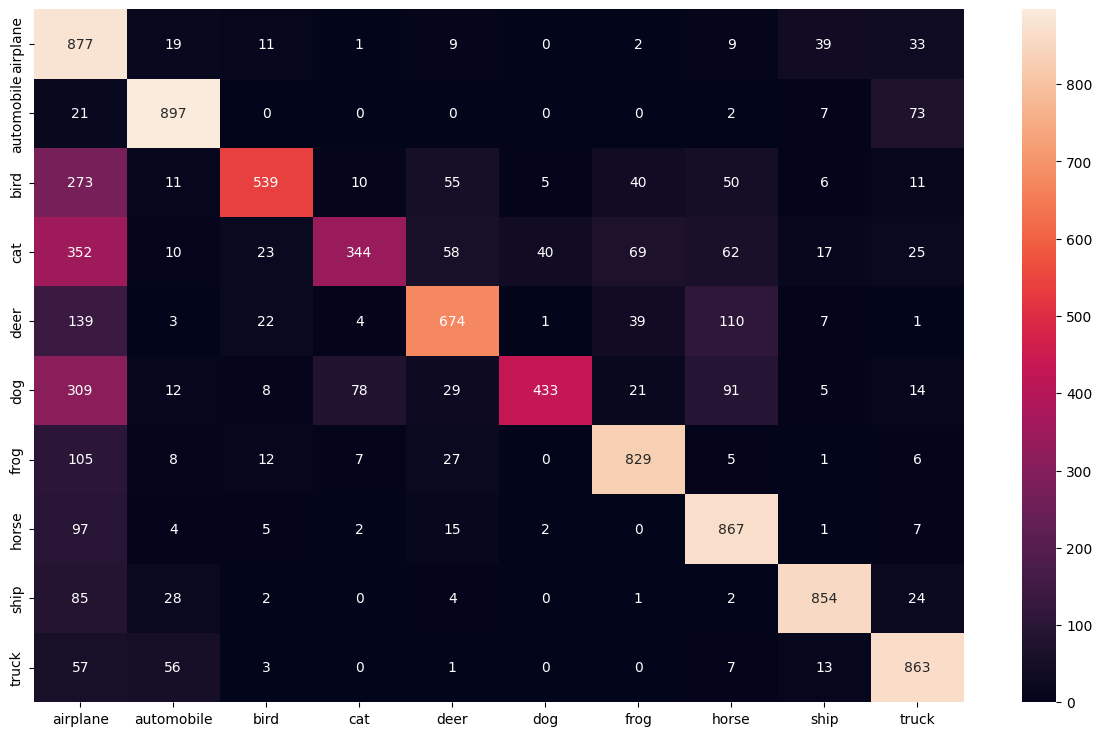

In [46]:
# Plotting the confusion_matrix and checking the points of each classes how accuractely model is predicting

plt.figure(figsize=(15,9))
y_test_labels=[np.argmax(y) for y in y_test]
y_pred_labels=[np.argmax(x) for x in y_pred]
cm=confusion_matrix(y_test_labels,y_pred_labels)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_Label,yticklabels=class_Label)


In [47]:
#checking the report of the model


cr=classification_report(y_test_labels,y_pred_labels,target_names=class_Label)
print(cr)

              precision    recall  f1-score   support

    airplane       0.38      0.88      0.53      1000
  automobile       0.86      0.90      0.88      1000
        bird       0.86      0.54      0.66      1000
         cat       0.77      0.34      0.48      1000
        deer       0.77      0.67      0.72      1000
         dog       0.90      0.43      0.58      1000
        frog       0.83      0.83      0.83      1000
       horse       0.72      0.87      0.79      1000
        ship       0.90      0.85      0.88      1000
       truck       0.82      0.86      0.84      1000

    accuracy                           0.72     10000
   macro avg       0.78      0.72      0.72     10000
weighted avg       0.78      0.72      0.72     10000



In [51]:
# Saving the model

model.save('/content/CIFAR_10_CNN.h5')

In [52]:
model_deploy=keras.models.load_model('/content/CIFAR_10_CNN.h5')